In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Creating function to save predictions to csv

In [2]:
def predict_tocsv(yhat_test):
    predicted = pd.DataFrame({"Id": np.arange(1461,2920), "SalePrice": yhat_test})
    return predicted.to_csv("./predicted.csv", index=False)

### Preparing Training Validation Testing

In [94]:
from sklearn.model_selection import train_test_split

train = pd.read_pickle("../train.pkl")
test = pd.read_pickle("../test.pkl")
temp = pd.read_csv("../data/train.csv")

#importing Saleprice from original dataframe
train["SalePrice"] = temp.SalePrice

#removing outliers
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]
train = train[~((train['MasVnrArea'] > 1400) & (train['SalePrice'] < 300000))]
train = train[~((train['LotArea'] > 200000) & (train['SalePrice'] < 500000))]
train = train[~((train['LotFrontage'] > 300) & (train['SalePrice'] < 300000))]
train = train[~((train['OpenPorchSF'] > 500) & (train['SalePrice'] < 100000))]

#Redefining X and y variables
X = train.drop(["SalePrice"], axis=1)
y = train["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

### Finding best n_estimators

In [4]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV 

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [77]:
#Finding best number of n_estimators for booster="gbtree"
results = []

max_depth = np.arange(3,8)
for depth in max_depth:
    xgb = XGBRegressor(max_depth=depth, n_estimators=10000, random_state=100)
    xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)],
        eval_metric="rmse", early_stopping_rounds=50)
    
    
    results.append({
        "max_depth": depth,
        "best_iter": xgb.best_iteration,
        "lowest_RMSE": xgb.best_score
    })


[0]	validation_0-rmse:173630
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:157281
[2]	validation_0-rmse:142338
[3]	validation_0-rmse:128669
[4]	validation_0-rmse:116761
[5]	validation_0-rmse:106171
[6]	validation_0-rmse:96668
[7]	validation_0-rmse:88056.3
[8]	validation_0-rmse:80345.5
[9]	validation_0-rmse:73584.3
[10]	validation_0-rmse:67559
[11]	validation_0-rmse:62119
[12]	validation_0-rmse:57378.6
[13]	validation_0-rmse:53052.9
[14]	validation_0-rmse:49522.9
[15]	validation_0-rmse:46169.4
[16]	validation_0-rmse:43211.7
[17]	validation_0-rmse:40643.2
[18]	validation_0-rmse:38315.2
[19]	validation_0-rmse:36370.2
[20]	validation_0-rmse:34784
[21]	validation_0-rmse:33347.6
[22]	validation_0-rmse:32048.4
[23]	validation_0-rmse:30879
[24]	validation_0-rmse:29913.6
[25]	validation_0-rmse:29260.4
[26]	validation_0-rmse:28417.4
[27]	validation_0-rmse:27891
[28]	validation_0-rmse:27498.9
[29]	validation_0-rmse:27028
[30]	validation_0-rmse:26701.1
[31]

[260]	validation_0-rmse:21951.9
[261]	validation_0-rmse:21960.1
[262]	validation_0-rmse:21952.6
[263]	validation_0-rmse:21931.1
[264]	validation_0-rmse:21931.1
[265]	validation_0-rmse:21933
[266]	validation_0-rmse:21938.9
[267]	validation_0-rmse:21929.1
[268]	validation_0-rmse:21933.7
[269]	validation_0-rmse:21918.5
[270]	validation_0-rmse:21913
[271]	validation_0-rmse:21906.9
[272]	validation_0-rmse:21913.6
[273]	validation_0-rmse:21915
[274]	validation_0-rmse:21916.2
[275]	validation_0-rmse:21907.1
[276]	validation_0-rmse:21917.6
[277]	validation_0-rmse:21910.7
[278]	validation_0-rmse:21932.9
[279]	validation_0-rmse:21943.5
[280]	validation_0-rmse:21925.1
[281]	validation_0-rmse:21922.4
[282]	validation_0-rmse:21904.5
[283]	validation_0-rmse:21910.8
[284]	validation_0-rmse:21905.7
[285]	validation_0-rmse:21908.2
[286]	validation_0-rmse:21890.7
[287]	validation_0-rmse:21883.2
[288]	validation_0-rmse:21886.6
[289]	validation_0-rmse:21881.1
[290]	validation_0-rmse:21892.9
[291]	validati

[518]	validation_0-rmse:21499.5
[519]	validation_0-rmse:21500.2
[520]	validation_0-rmse:21505.5
[521]	validation_0-rmse:21500.2
[522]	validation_0-rmse:21493.4
[523]	validation_0-rmse:21494.8
[524]	validation_0-rmse:21498.2
[525]	validation_0-rmse:21498.5
[526]	validation_0-rmse:21494.4
[527]	validation_0-rmse:21490.9
[528]	validation_0-rmse:21494.7
[529]	validation_0-rmse:21495.5
[530]	validation_0-rmse:21481.8
[531]	validation_0-rmse:21487
[532]	validation_0-rmse:21481.3
[533]	validation_0-rmse:21483.7
[534]	validation_0-rmse:21492.8
[535]	validation_0-rmse:21492.6
[536]	validation_0-rmse:21494.9
[537]	validation_0-rmse:21500.6
[538]	validation_0-rmse:21499.6
[539]	validation_0-rmse:21495
[540]	validation_0-rmse:21492.2
[541]	validation_0-rmse:21489.9
[542]	validation_0-rmse:21482.8
[543]	validation_0-rmse:21485.7
[544]	validation_0-rmse:21475.8
[545]	validation_0-rmse:21468.2
[546]	validation_0-rmse:21471
[547]	validation_0-rmse:21462.3
[548]	validation_0-rmse:21466.1
[549]	validati

[117]	validation_0-rmse:24147.6
[118]	validation_0-rmse:24162
[119]	validation_0-rmse:24143.5
[120]	validation_0-rmse:24124.3
[121]	validation_0-rmse:24141.5
[122]	validation_0-rmse:24146.4
[123]	validation_0-rmse:24135.9
[124]	validation_0-rmse:24135.5
[125]	validation_0-rmse:24122.9
[126]	validation_0-rmse:24116.6
[127]	validation_0-rmse:24120.3
[128]	validation_0-rmse:24126.9
[129]	validation_0-rmse:24136.2
[130]	validation_0-rmse:24129.7
[131]	validation_0-rmse:24125.2
[132]	validation_0-rmse:24121.7
[133]	validation_0-rmse:24105.5
[134]	validation_0-rmse:24079.3
[135]	validation_0-rmse:24096.6
[136]	validation_0-rmse:24106.3
[137]	validation_0-rmse:24086.8
[138]	validation_0-rmse:24074.7
[139]	validation_0-rmse:24079.7
[140]	validation_0-rmse:24072.2
[141]	validation_0-rmse:24067.4
[142]	validation_0-rmse:24055.8
[143]	validation_0-rmse:24070.5
[144]	validation_0-rmse:24072.3
[145]	validation_0-rmse:24068.6
[146]	validation_0-rmse:24058.8
[147]	validation_0-rmse:24039.6
[148]	vali

[160]	validation_0-rmse:25076.7
[161]	validation_0-rmse:25073.8
[162]	validation_0-rmse:25062
[163]	validation_0-rmse:25052.5
[164]	validation_0-rmse:25048.6
[165]	validation_0-rmse:25054
[166]	validation_0-rmse:25053.8
[167]	validation_0-rmse:25053
[168]	validation_0-rmse:25056.8
[169]	validation_0-rmse:25057
[170]	validation_0-rmse:25061.8
[171]	validation_0-rmse:25052.1
[172]	validation_0-rmse:25052.3
[173]	validation_0-rmse:25053.3
[174]	validation_0-rmse:25058.2
[175]	validation_0-rmse:25063.2
[176]	validation_0-rmse:25060.8
[177]	validation_0-rmse:25057.1
[178]	validation_0-rmse:25052.6
[179]	validation_0-rmse:25051.9
[180]	validation_0-rmse:25059.4
[181]	validation_0-rmse:25060.2
[182]	validation_0-rmse:25064.1
[183]	validation_0-rmse:25060.7
[184]	validation_0-rmse:25061.8
[185]	validation_0-rmse:25070.7
[186]	validation_0-rmse:25062.9
[187]	validation_0-rmse:25066.7
[188]	validation_0-rmse:25051.5
[189]	validation_0-rmse:25048.8
[190]	validation_0-rmse:25050.9
[191]	validation

[143]	validation_0-rmse:24269
[144]	validation_0-rmse:24272
[145]	validation_0-rmse:24277.6
[146]	validation_0-rmse:24277.3
[147]	validation_0-rmse:24275.3
[148]	validation_0-rmse:24270.5
[149]	validation_0-rmse:24274.6
[150]	validation_0-rmse:24278.3
[151]	validation_0-rmse:24286.4
[152]	validation_0-rmse:24277.2
[153]	validation_0-rmse:24279.3
[154]	validation_0-rmse:24274.7
[155]	validation_0-rmse:24259.8
[156]	validation_0-rmse:24257.5
[157]	validation_0-rmse:24257.2
[158]	validation_0-rmse:24256.9
[159]	validation_0-rmse:24250.4
[160]	validation_0-rmse:24256.1
[161]	validation_0-rmse:24254.2
[162]	validation_0-rmse:24252.5
[163]	validation_0-rmse:24240.6
[164]	validation_0-rmse:24245
[165]	validation_0-rmse:24247.4
[166]	validation_0-rmse:24252.3
[167]	validation_0-rmse:24247.6
[168]	validation_0-rmse:24249.1
[169]	validation_0-rmse:24247.5
[170]	validation_0-rmse:24249.4
[171]	validation_0-rmse:24249.5
[172]	validation_0-rmse:24252.6
[173]	validation_0-rmse:24254.8
[174]	validati

In [78]:
results

[{'max_depth': 3, 'best_iter': 608, 'lowest_RMSE': 21417.851563},
 {'max_depth': 4, 'best_iter': 163, 'lowest_RMSE': 23936.080078},
 {'max_depth': 5, 'best_iter': 224, 'lowest_RMSE': 24967.382813},
 {'max_depth': 6, 'best_iter': 163, 'lowest_RMSE': 24240.615234},
 {'max_depth': 7, 'best_iter': 125, 'lowest_RMSE': 25309.503906}]

In [6]:
#Finding best number of n_estimators for booster="gblinear" - doesnt early stop
results = []

max_depth = np.arange(3,8)
for depth in max_depth:
    xgb = XGBRegressor(booster = "gblinear", learning_rate = 1, max_depth=depth, n_estimators=1000)
    xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric="rmse", early_stopping_rounds=2)
    
    results.append({
        "max_depth": depth,
        "best_iter": xgb.best_iteration,
        "lowest_RMSE": xgb.best_score
    })

[0]	validation_0-rmse:48190
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:45785.8
[2]	validation_0-rmse:45085.3
[3]	validation_0-rmse:44206.7
[4]	validation_0-rmse:43402.4
[5]	validation_0-rmse:42712.3
[6]	validation_0-rmse:42106
[7]	validation_0-rmse:41563
[8]	validation_0-rmse:41074.5
[9]	validation_0-rmse:40635.2
[10]	validation_0-rmse:40239.8
[11]	validation_0-rmse:39883.4
[12]	validation_0-rmse:39561.5
[13]	validation_0-rmse:39270
[14]	validation_0-rmse:39005.6
[15]	validation_0-rmse:38765.4
[16]	validation_0-rmse:38547
[17]	validation_0-rmse:38348.1
[18]	validation_0-rmse:38166.7
[19]	validation_0-rmse:38001.3
[20]	validation_0-rmse:37850.1
[21]	validation_0-rmse:37711.9
[22]	validation_0-rmse:37585.4
[23]	validation_0-rmse:37469.5
[24]	validation_0-rmse:37363.2
[25]	validation_0-rmse:37265.6
[26]	validation_0-rmse:37176
[27]	validation_0-rmse:37093.4
[28]	validation_0-rmse:37017.3
[29]	validation_0-rmse:36947.1
[30]	validation_0-rmse:36882

[259]	validation_0-rmse:35056.6
[260]	validation_0-rmse:35056
[261]	validation_0-rmse:35055.3
[262]	validation_0-rmse:35054.7
[263]	validation_0-rmse:35054.1
[264]	validation_0-rmse:35053.4
[265]	validation_0-rmse:35052.8
[266]	validation_0-rmse:35052.2
[267]	validation_0-rmse:35051.6
[268]	validation_0-rmse:35051
[269]	validation_0-rmse:35050.4
[270]	validation_0-rmse:35049.8
[271]	validation_0-rmse:35049.2
[272]	validation_0-rmse:35048.7
[273]	validation_0-rmse:35048.1
[274]	validation_0-rmse:35047.5
[275]	validation_0-rmse:35047
[276]	validation_0-rmse:35046.4
[277]	validation_0-rmse:35045.9
[278]	validation_0-rmse:35045.4
[279]	validation_0-rmse:35044.8
[280]	validation_0-rmse:35044.3
[281]	validation_0-rmse:35043.8
[282]	validation_0-rmse:35043.2
[283]	validation_0-rmse:35042.7
[284]	validation_0-rmse:35042.2
[285]	validation_0-rmse:35041.7
[286]	validation_0-rmse:35041.2
[287]	validation_0-rmse:35040.7
[288]	validation_0-rmse:35040.2
[289]	validation_0-rmse:35039.8
[290]	validati

[517]	validation_0-rmse:34988.3
[518]	validation_0-rmse:34988.2
[519]	validation_0-rmse:34988.1
[520]	validation_0-rmse:34987.9
[521]	validation_0-rmse:34987.8
[522]	validation_0-rmse:34987.7
[523]	validation_0-rmse:34987.6
[524]	validation_0-rmse:34987.5
[525]	validation_0-rmse:34987.4
[526]	validation_0-rmse:34987.3
[527]	validation_0-rmse:34987.2
[528]	validation_0-rmse:34987.1
[529]	validation_0-rmse:34987
[530]	validation_0-rmse:34986.9
[531]	validation_0-rmse:34986.8
[532]	validation_0-rmse:34986.6
[533]	validation_0-rmse:34986.5
[534]	validation_0-rmse:34986.4
[535]	validation_0-rmse:34986.3
[536]	validation_0-rmse:34986.2
[537]	validation_0-rmse:34986.1
[538]	validation_0-rmse:34986
[539]	validation_0-rmse:34985.9
[540]	validation_0-rmse:34985.8
[541]	validation_0-rmse:34985.7
[542]	validation_0-rmse:34985.6
[543]	validation_0-rmse:34985.5
[544]	validation_0-rmse:34985.4
[545]	validation_0-rmse:34985.3
[546]	validation_0-rmse:34985.2
[547]	validation_0-rmse:34985.1
[548]	valida

[775]	validation_0-rmse:34966.3
[776]	validation_0-rmse:34966.3
[777]	validation_0-rmse:34966.2
[778]	validation_0-rmse:34966.1
[779]	validation_0-rmse:34966.1
[780]	validation_0-rmse:34966
[781]	validation_0-rmse:34965.9
[782]	validation_0-rmse:34965.8
[783]	validation_0-rmse:34965.8
[784]	validation_0-rmse:34965.7
[785]	validation_0-rmse:34965.6
[786]	validation_0-rmse:34965.6
[787]	validation_0-rmse:34965.5
[788]	validation_0-rmse:34965.4
[789]	validation_0-rmse:34965.3
[790]	validation_0-rmse:34965.3
[791]	validation_0-rmse:34965.2
[792]	validation_0-rmse:34965.1
[793]	validation_0-rmse:34965
[794]	validation_0-rmse:34965
[795]	validation_0-rmse:34964.9
[796]	validation_0-rmse:34964.8
[797]	validation_0-rmse:34964.8
[798]	validation_0-rmse:34964.7
[799]	validation_0-rmse:34964.6
[800]	validation_0-rmse:34964.6
[801]	validation_0-rmse:34964.5
[802]	validation_0-rmse:34964.4
[803]	validation_0-rmse:34964.3
[804]	validation_0-rmse:34964.3
[805]	validation_0-rmse:34964.2
[806]	validati

[33]	validation_0-rmse:36714.3
[34]	validation_0-rmse:36666
[35]	validation_0-rmse:36620.8
[36]	validation_0-rmse:36578.4
[37]	validation_0-rmse:36538.7
[38]	validation_0-rmse:36501.2
[39]	validation_0-rmse:36465.8
[40]	validation_0-rmse:36432.3
[41]	validation_0-rmse:36400.5
[42]	validation_0-rmse:36370.2
[43]	validation_0-rmse:36341.2
[44]	validation_0-rmse:36313.4
[45]	validation_0-rmse:36286.7
[46]	validation_0-rmse:36261
[47]	validation_0-rmse:36236.2
[48]	validation_0-rmse:36212.2
[49]	validation_0-rmse:36188.9
[50]	validation_0-rmse:36166.3
[51]	validation_0-rmse:36144.3
[52]	validation_0-rmse:36122.8
[53]	validation_0-rmse:36101.8
[54]	validation_0-rmse:36081.3
[55]	validation_0-rmse:36061.2
[56]	validation_0-rmse:36041.5
[57]	validation_0-rmse:36022.2
[58]	validation_0-rmse:36003.3
[59]	validation_0-rmse:35984.7
[60]	validation_0-rmse:35966.4
[61]	validation_0-rmse:35948.5
[62]	validation_0-rmse:35930.8
[63]	validation_0-rmse:35913.5
[64]	validation_0-rmse:35896.4
[65]	validat

[293]	validation_0-rmse:35037.9
[294]	validation_0-rmse:35037.4
[295]	validation_0-rmse:35036.9
[296]	validation_0-rmse:35036.5
[297]	validation_0-rmse:35036
[298]	validation_0-rmse:35035.6
[299]	validation_0-rmse:35035.2
[300]	validation_0-rmse:35034.7
[301]	validation_0-rmse:35034.3
[302]	validation_0-rmse:35033.9
[303]	validation_0-rmse:35033.4
[304]	validation_0-rmse:35033
[305]	validation_0-rmse:35032.6
[306]	validation_0-rmse:35032.2
[307]	validation_0-rmse:35031.8
[308]	validation_0-rmse:35031.4
[309]	validation_0-rmse:35031
[310]	validation_0-rmse:35030.6
[311]	validation_0-rmse:35030.2
[312]	validation_0-rmse:35029.8
[313]	validation_0-rmse:35029.4
[314]	validation_0-rmse:35029
[315]	validation_0-rmse:35028.6
[316]	validation_0-rmse:35028.3
[317]	validation_0-rmse:35027.9
[318]	validation_0-rmse:35027.5
[319]	validation_0-rmse:35027.1
[320]	validation_0-rmse:35026.8
[321]	validation_0-rmse:35026.4
[322]	validation_0-rmse:35026.1
[323]	validation_0-rmse:35025.7
[324]	validation

[551]	validation_0-rmse:34984.7
[552]	validation_0-rmse:34984.6
[553]	validation_0-rmse:34984.5
[554]	validation_0-rmse:34984.4
[555]	validation_0-rmse:34984.3
[556]	validation_0-rmse:34984.2
[557]	validation_0-rmse:34984.1
[558]	validation_0-rmse:34984
[559]	validation_0-rmse:34983.9
[560]	validation_0-rmse:34983.8
[561]	validation_0-rmse:34983.7
[562]	validation_0-rmse:34983.6
[563]	validation_0-rmse:34983.5
[564]	validation_0-rmse:34983.4
[565]	validation_0-rmse:34983.3
[566]	validation_0-rmse:34983.2
[567]	validation_0-rmse:34983.1
[568]	validation_0-rmse:34983
[569]	validation_0-rmse:34982.9
[570]	validation_0-rmse:34982.9
[571]	validation_0-rmse:34982.7
[572]	validation_0-rmse:34982.7
[573]	validation_0-rmse:34982.6
[574]	validation_0-rmse:34982.5
[575]	validation_0-rmse:34982.4
[576]	validation_0-rmse:34982.3
[577]	validation_0-rmse:34982.2
[578]	validation_0-rmse:34982.1
[579]	validation_0-rmse:34982
[580]	validation_0-rmse:34981.9
[581]	validation_0-rmse:34981.8
[582]	validati

[809]	validation_0-rmse:34963.9
[810]	validation_0-rmse:34963.8
[811]	validation_0-rmse:34963.8
[812]	validation_0-rmse:34963.7
[813]	validation_0-rmse:34963.6
[814]	validation_0-rmse:34963.6
[815]	validation_0-rmse:34963.5
[816]	validation_0-rmse:34963.4
[817]	validation_0-rmse:34963.3
[818]	validation_0-rmse:34963.3
[819]	validation_0-rmse:34963.2
[820]	validation_0-rmse:34963.1
[821]	validation_0-rmse:34963.1
[822]	validation_0-rmse:34963
[823]	validation_0-rmse:34962.9
[824]	validation_0-rmse:34962.8
[825]	validation_0-rmse:34962.8
[826]	validation_0-rmse:34962.7
[827]	validation_0-rmse:34962.6
[828]	validation_0-rmse:34962.6
[829]	validation_0-rmse:34962.5
[830]	validation_0-rmse:34962.4
[831]	validation_0-rmse:34962.4
[832]	validation_0-rmse:34962.3
[833]	validation_0-rmse:34962.2
[834]	validation_0-rmse:34962.1
[835]	validation_0-rmse:34962.1
[836]	validation_0-rmse:34962
[837]	validation_0-rmse:34961.9
[838]	validation_0-rmse:34961.9
[839]	validation_0-rmse:34961.8
[840]	valida

[68]	validation_0-rmse:35830.9
[69]	validation_0-rmse:35815.2
[70]	validation_0-rmse:35799.8
[71]	validation_0-rmse:35784.6
[72]	validation_0-rmse:35769.7
[73]	validation_0-rmse:35755.1
[74]	validation_0-rmse:35740.7
[75]	validation_0-rmse:35726.6
[76]	validation_0-rmse:35712.7
[77]	validation_0-rmse:35699.1
[78]	validation_0-rmse:35685.7
[79]	validation_0-rmse:35672.6
[80]	validation_0-rmse:35659.8
[81]	validation_0-rmse:35647.2
[82]	validation_0-rmse:35634.9
[83]	validation_0-rmse:35622.8
[84]	validation_0-rmse:35610.9
[85]	validation_0-rmse:35599.3
[86]	validation_0-rmse:35587.9
[87]	validation_0-rmse:35576.8
[88]	validation_0-rmse:35565.9
[89]	validation_0-rmse:35555.3
[90]	validation_0-rmse:35544.8
[91]	validation_0-rmse:35534.6
[92]	validation_0-rmse:35524.7
[93]	validation_0-rmse:35514.9
[94]	validation_0-rmse:35505.4
[95]	validation_0-rmse:35496
[96]	validation_0-rmse:35486.9
[97]	validation_0-rmse:35478
[98]	validation_0-rmse:35469.3
[99]	validation_0-rmse:35460.8
[100]	valida

[327]	validation_0-rmse:35024.3
[328]	validation_0-rmse:35024
[329]	validation_0-rmse:35023.7
[330]	validation_0-rmse:35023.3
[331]	validation_0-rmse:35023
[332]	validation_0-rmse:35022.7
[333]	validation_0-rmse:35022.3
[334]	validation_0-rmse:35022
[335]	validation_0-rmse:35021.7
[336]	validation_0-rmse:35021.4
[337]	validation_0-rmse:35021.1
[338]	validation_0-rmse:35020.8
[339]	validation_0-rmse:35020.4
[340]	validation_0-rmse:35020.1
[341]	validation_0-rmse:35019.8
[342]	validation_0-rmse:35019.5
[343]	validation_0-rmse:35019.2
[344]	validation_0-rmse:35018.9
[345]	validation_0-rmse:35018.6
[346]	validation_0-rmse:35018.3
[347]	validation_0-rmse:35018.1
[348]	validation_0-rmse:35017.8
[349]	validation_0-rmse:35017.5
[350]	validation_0-rmse:35017.2
[351]	validation_0-rmse:35016.9
[352]	validation_0-rmse:35016.6
[353]	validation_0-rmse:35016.4
[354]	validation_0-rmse:35016.1
[355]	validation_0-rmse:35015.8
[356]	validation_0-rmse:35015.5
[357]	validation_0-rmse:35015.3
[358]	validati

[585]	validation_0-rmse:34981.4
[586]	validation_0-rmse:34981.4
[587]	validation_0-rmse:34981.3
[588]	validation_0-rmse:34981.2
[589]	validation_0-rmse:34981.1
[590]	validation_0-rmse:34981
[591]	validation_0-rmse:34980.9
[592]	validation_0-rmse:34980.8
[593]	validation_0-rmse:34980.7
[594]	validation_0-rmse:34980.6
[595]	validation_0-rmse:34980.5
[596]	validation_0-rmse:34980.4
[597]	validation_0-rmse:34980.4
[598]	validation_0-rmse:34980.3
[599]	validation_0-rmse:34980.2
[600]	validation_0-rmse:34980.1
[601]	validation_0-rmse:34980
[602]	validation_0-rmse:34979.9
[603]	validation_0-rmse:34979.8
[604]	validation_0-rmse:34979.7
[605]	validation_0-rmse:34979.7
[606]	validation_0-rmse:34979.6
[607]	validation_0-rmse:34979.5
[608]	validation_0-rmse:34979.4
[609]	validation_0-rmse:34979.3
[610]	validation_0-rmse:34979.2
[611]	validation_0-rmse:34979.1
[612]	validation_0-rmse:34979
[613]	validation_0-rmse:34979
[614]	validation_0-rmse:34978.9
[615]	validation_0-rmse:34978.8
[616]	validation

[843]	validation_0-rmse:34961.5
[844]	validation_0-rmse:34961.4
[845]	validation_0-rmse:34961.4
[846]	validation_0-rmse:34961.3
[847]	validation_0-rmse:34961.2
[848]	validation_0-rmse:34961.2
[849]	validation_0-rmse:34961.1
[850]	validation_0-rmse:34961
[851]	validation_0-rmse:34961
[852]	validation_0-rmse:34960.9
[853]	validation_0-rmse:34960.8
[854]	validation_0-rmse:34960.8
[855]	validation_0-rmse:34960.7
[856]	validation_0-rmse:34960.6
[857]	validation_0-rmse:34960.5
[858]	validation_0-rmse:34960.5
[859]	validation_0-rmse:34960.4
[860]	validation_0-rmse:34960.4
[861]	validation_0-rmse:34960.3
[862]	validation_0-rmse:34960.2
[863]	validation_0-rmse:34960.1
[864]	validation_0-rmse:34960.1
[865]	validation_0-rmse:34960
[866]	validation_0-rmse:34959.9
[867]	validation_0-rmse:34959.9
[868]	validation_0-rmse:34959.8
[869]	validation_0-rmse:34959.7
[870]	validation_0-rmse:34959.6
[871]	validation_0-rmse:34959.6
[872]	validation_0-rmse:34959.5
[873]	validation_0-rmse:34959.4
[874]	validati

[103]	validation_0-rmse:35428.7
[104]	validation_0-rmse:35421.1
[105]	validation_0-rmse:35413.7
[106]	validation_0-rmse:35406.5
[107]	validation_0-rmse:35399.4
[108]	validation_0-rmse:35392.5
[109]	validation_0-rmse:35385.8
[110]	validation_0-rmse:35379.2
[111]	validation_0-rmse:35372.8
[112]	validation_0-rmse:35366.5
[113]	validation_0-rmse:35360.4
[114]	validation_0-rmse:35354.4
[115]	validation_0-rmse:35348.5
[116]	validation_0-rmse:35342.8
[117]	validation_0-rmse:35337.3
[118]	validation_0-rmse:35331.8
[119]	validation_0-rmse:35326.4
[120]	validation_0-rmse:35321.2
[121]	validation_0-rmse:35316.1
[122]	validation_0-rmse:35311.2
[123]	validation_0-rmse:35306.3
[124]	validation_0-rmse:35301.5
[125]	validation_0-rmse:35296.9
[126]	validation_0-rmse:35292.3
[127]	validation_0-rmse:35287.8
[128]	validation_0-rmse:35283.5
[129]	validation_0-rmse:35279.2
[130]	validation_0-rmse:35275.1
[131]	validation_0-rmse:35271
[132]	validation_0-rmse:35266.9
[133]	validation_0-rmse:35263
[134]	valida

[361]	validation_0-rmse:35014.2
[362]	validation_0-rmse:35014
[363]	validation_0-rmse:35013.7
[364]	validation_0-rmse:35013.4
[365]	validation_0-rmse:35013.2
[366]	validation_0-rmse:35012.9
[367]	validation_0-rmse:35012.7
[368]	validation_0-rmse:35012.5
[369]	validation_0-rmse:35012.2
[370]	validation_0-rmse:35012
[371]	validation_0-rmse:35011.7
[372]	validation_0-rmse:35011.5
[373]	validation_0-rmse:35011.2
[374]	validation_0-rmse:35011
[375]	validation_0-rmse:35010.8
[376]	validation_0-rmse:35010.5
[377]	validation_0-rmse:35010.3
[378]	validation_0-rmse:35010.1
[379]	validation_0-rmse:35009.8
[380]	validation_0-rmse:35009.6
[381]	validation_0-rmse:35009.4
[382]	validation_0-rmse:35009.2
[383]	validation_0-rmse:35008.9
[384]	validation_0-rmse:35008.7
[385]	validation_0-rmse:35008.5
[386]	validation_0-rmse:35008.3
[387]	validation_0-rmse:35008.1
[388]	validation_0-rmse:35007.9
[389]	validation_0-rmse:35007.6
[390]	validation_0-rmse:35007.4
[391]	validation_0-rmse:35007.2
[392]	validati

[619]	validation_0-rmse:34978.4
[620]	validation_0-rmse:34978.4
[621]	validation_0-rmse:34978.3
[622]	validation_0-rmse:34978.2
[623]	validation_0-rmse:34978.1
[624]	validation_0-rmse:34978
[625]	validation_0-rmse:34977.9
[626]	validation_0-rmse:34977.9
[627]	validation_0-rmse:34977.8
[628]	validation_0-rmse:34977.7
[629]	validation_0-rmse:34977.6
[630]	validation_0-rmse:34977.5
[631]	validation_0-rmse:34977.4
[632]	validation_0-rmse:34977.4
[633]	validation_0-rmse:34977.3
[634]	validation_0-rmse:34977.2
[635]	validation_0-rmse:34977.1
[636]	validation_0-rmse:34977
[637]	validation_0-rmse:34976.9
[638]	validation_0-rmse:34976.8
[639]	validation_0-rmse:34976.8
[640]	validation_0-rmse:34976.7
[641]	validation_0-rmse:34976.6
[642]	validation_0-rmse:34976.5
[643]	validation_0-rmse:34976.4
[644]	validation_0-rmse:34976.3
[645]	validation_0-rmse:34976.2
[646]	validation_0-rmse:34976.2
[647]	validation_0-rmse:34976.1
[648]	validation_0-rmse:34976
[649]	validation_0-rmse:34975.9
[650]	validati

[877]	validation_0-rmse:34959.2
[878]	validation_0-rmse:34959.1
[879]	validation_0-rmse:34959
[880]	validation_0-rmse:34959
[881]	validation_0-rmse:34958.9
[882]	validation_0-rmse:34958.8
[883]	validation_0-rmse:34958.8
[884]	validation_0-rmse:34958.7
[885]	validation_0-rmse:34958.6
[886]	validation_0-rmse:34958.5
[887]	validation_0-rmse:34958.5
[888]	validation_0-rmse:34958.4
[889]	validation_0-rmse:34958.3
[890]	validation_0-rmse:34958.3
[891]	validation_0-rmse:34958.2
[892]	validation_0-rmse:34958.1
[893]	validation_0-rmse:34958.1
[894]	validation_0-rmse:34958
[895]	validation_0-rmse:34957.9
[896]	validation_0-rmse:34957.9
[897]	validation_0-rmse:34957.8
[898]	validation_0-rmse:34957.7
[899]	validation_0-rmse:34957.7
[900]	validation_0-rmse:34957.6
[901]	validation_0-rmse:34957.5
[902]	validation_0-rmse:34957.5
[903]	validation_0-rmse:34957.4
[904]	validation_0-rmse:34957.3
[905]	validation_0-rmse:34957.2
[906]	validation_0-rmse:34957.2
[907]	validation_0-rmse:34957.1
[908]	validati

[137]	validation_0-rmse:35248.2
[138]	validation_0-rmse:35244.6
[139]	validation_0-rmse:35241.1
[140]	validation_0-rmse:35237.8
[141]	validation_0-rmse:35234.4
[142]	validation_0-rmse:35231.2
[143]	validation_0-rmse:35228
[144]	validation_0-rmse:35224.8
[145]	validation_0-rmse:35221.8
[146]	validation_0-rmse:35218.7
[147]	validation_0-rmse:35215.8
[148]	validation_0-rmse:35212.9
[149]	validation_0-rmse:35210
[150]	validation_0-rmse:35207.2
[151]	validation_0-rmse:35204.4
[152]	validation_0-rmse:35201.7
[153]	validation_0-rmse:35199.1
[154]	validation_0-rmse:35196.5
[155]	validation_0-rmse:35193.9
[156]	validation_0-rmse:35191.4
[157]	validation_0-rmse:35188.9
[158]	validation_0-rmse:35186.5
[159]	validation_0-rmse:35184.1
[160]	validation_0-rmse:35181.7
[161]	validation_0-rmse:35179.4
[162]	validation_0-rmse:35177.1
[163]	validation_0-rmse:35174.9
[164]	validation_0-rmse:35172.7
[165]	validation_0-rmse:35170.5
[166]	validation_0-rmse:35168.4
[167]	validation_0-rmse:35166.3
[168]	valida

[395]	validation_0-rmse:35006.4
[396]	validation_0-rmse:35006.2
[397]	validation_0-rmse:35006
[398]	validation_0-rmse:35005.8
[399]	validation_0-rmse:35005.6
[400]	validation_0-rmse:35005.4
[401]	validation_0-rmse:35005.2
[402]	validation_0-rmse:35005
[403]	validation_0-rmse:35004.8
[404]	validation_0-rmse:35004.6
[405]	validation_0-rmse:35004.4
[406]	validation_0-rmse:35004.2
[407]	validation_0-rmse:35004
[408]	validation_0-rmse:35003.9
[409]	validation_0-rmse:35003.7
[410]	validation_0-rmse:35003.5
[411]	validation_0-rmse:35003.3
[412]	validation_0-rmse:35003.1
[413]	validation_0-rmse:35002.9
[414]	validation_0-rmse:35002.8
[415]	validation_0-rmse:35002.6
[416]	validation_0-rmse:35002.4
[417]	validation_0-rmse:35002.2
[418]	validation_0-rmse:35002
[419]	validation_0-rmse:35001.9
[420]	validation_0-rmse:35001.7
[421]	validation_0-rmse:35001.5
[422]	validation_0-rmse:35001.3
[423]	validation_0-rmse:35001.2
[424]	validation_0-rmse:35001
[425]	validation_0-rmse:35000.8
[426]	validation_0

[653]	validation_0-rmse:34975.6
[654]	validation_0-rmse:34975.5
[655]	validation_0-rmse:34975.5
[656]	validation_0-rmse:34975.4
[657]	validation_0-rmse:34975.3
[658]	validation_0-rmse:34975.2
[659]	validation_0-rmse:34975.1
[660]	validation_0-rmse:34975
[661]	validation_0-rmse:34975
[662]	validation_0-rmse:34974.9
[663]	validation_0-rmse:34974.8
[664]	validation_0-rmse:34974.7
[665]	validation_0-rmse:34974.6
[666]	validation_0-rmse:34974.6
[667]	validation_0-rmse:34974.5
[668]	validation_0-rmse:34974.4
[669]	validation_0-rmse:34974.3
[670]	validation_0-rmse:34974.3
[671]	validation_0-rmse:34974.2
[672]	validation_0-rmse:34974.1
[673]	validation_0-rmse:34974
[674]	validation_0-rmse:34973.9
[675]	validation_0-rmse:34973.8
[676]	validation_0-rmse:34973.8
[677]	validation_0-rmse:34973.7
[678]	validation_0-rmse:34973.6
[679]	validation_0-rmse:34973.5
[680]	validation_0-rmse:34973.5
[681]	validation_0-rmse:34973.4
[682]	validation_0-rmse:34973.3
[683]	validation_0-rmse:34973.2
[684]	validati

[911]	validation_0-rmse:34956.8
[912]	validation_0-rmse:34956.8
[913]	validation_0-rmse:34956.7
[914]	validation_0-rmse:34956.6
[915]	validation_0-rmse:34956.6
[916]	validation_0-rmse:34956.5
[917]	validation_0-rmse:34956.4
[918]	validation_0-rmse:34956.4
[919]	validation_0-rmse:34956.3
[920]	validation_0-rmse:34956.2
[921]	validation_0-rmse:34956.2
[922]	validation_0-rmse:34956.1
[923]	validation_0-rmse:34956
[924]	validation_0-rmse:34955.9
[925]	validation_0-rmse:34955.9
[926]	validation_0-rmse:34955.8
[927]	validation_0-rmse:34955.8
[928]	validation_0-rmse:34955.7
[929]	validation_0-rmse:34955.6
[930]	validation_0-rmse:34955.6
[931]	validation_0-rmse:34955.5
[932]	validation_0-rmse:34955.4
[933]	validation_0-rmse:34955.4
[934]	validation_0-rmse:34955.3
[935]	validation_0-rmse:34955.2
[936]	validation_0-rmse:34955.1
[937]	validation_0-rmse:34955.1
[938]	validation_0-rmse:34955
[939]	validation_0-rmse:34954.9
[940]	validation_0-rmse:34954.9
[941]	validation_0-rmse:34954.8
[942]	valida

In [7]:
results

[{'max_depth': 3, 'best_iter': 999, 'lowest_RMSE': 34950.910156},
 {'max_depth': 4, 'best_iter': 999, 'lowest_RMSE': 34950.910156},
 {'max_depth': 5, 'best_iter': 999, 'lowest_RMSE': 34950.910156},
 {'max_depth': 6, 'best_iter': 999, 'lowest_RMSE': 34950.910156},
 {'max_depth': 7, 'best_iter': 999, 'lowest_RMSE': 34950.910156}]

### Tuning min_child_weight

In [47]:
#default booster is "gbtree"

param_1 = {
    'min_child_weight': np.arange(1,6,2),
}

grid = GridSearchCV(estimator=XGBRegressor(n_estimators=608, max_depth=3), param_grid=param_1, 
                    scoring="neg_mean_squared_error",  cv=5)
grid.fit(X, y)

grid.best_params_, grid.best_score_

({'max_depth': 3, 'min_child_weight': 3}, -541809522.7378676)

In [54]:
pred_Sales = grid.predict(test)

predict_tocsv(pred_Sales)

In [55]:
#changing booster to "gblinear" - poor scores on kaggle

param_1a = {
    'min_child_weight': np.arange(1,6,2),
}

grid = GridSearchCV(estimator=XGBRegressor(booster="gblinear", n_estimators=350, max_depth=3), param_grid=param_1a, 
                    scoring="neg_mean_squared_error", n_jobs=-1, cv=5)
grid.fit(X, y)

grid.best_params_, grid.best_score_

({'min_child_weight': 1}, -1231103649.5317636)

### Tuning subsample and lambda

In [15]:
from sklearn.metrics import r2_score

param_2 = {
    'subsample':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

grid = GridSearchCV(estimator=XGBRegressor(n_estimators=134, max_depth=3), param_grid=param_1, 
                    scoring="neg_mean_squared_error", cv=5)
grid.fit(X, y)

grid.best_params_, grid.best_score_

({'reg_alpha': 1e-05, 'subsample': 0.85}, -528860030.35631573)

In [16]:
pred_Sales = grid.predict(test)

predict_tocsv(pred_Sales)

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_param = {
    "n_estimators": np.linspace(start=100, stop=1000, num=10, dtype=int),
    "min_samples_leaf": np.linspace(2,50, 5, dtype=int),
    "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
    "random_state": [100]}

rf = RandomForestRegressor(oob_score=True)
grid_rf = GridSearchCV(rf, rf_param, cv=5, n_jobs=-1)


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
grid_rf.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 'min_samples_leaf': array([ 2, 14, 26, 38, 50]), 'min_samples_split': array([ 2,  9, 16, 23, 30]), 'random_state': [100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [21]:
grid_rf.best_params_, grid_rf.best_score_

({'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 600,
  'random_state': 100},
 0.8871448121236052)

In [22]:
pred_Sales = grid_rf.predict(test)

predict_tocsv(pred_Sales)

### Creating Noise Variable and Feature Importance

In [99]:
train_rn = train.copy()
train_rn["Random_Noise"] = np.random.random(size=len(train_rn))

X_rn = train_rn.drop("SalePrice", axis=1)
y_rn = train_rn.SalePrice

rf = RandomForestRegressor(n_estimators = 600, random_state=100, max_features=20, oob_score=True)
rf.fit(X_rn, y_rn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=600, n_jobs=1, oob_score=True, random_state=100,
           verbose=0, warm_start=False)

In [107]:
pd.options.display.max_rows = 300

importance = pd.DataFrame({"values":rf.feature_importances_}, index=X_rn.columns).sort_values("values",ascending=False)
importance = importance.reset_index()
importance.columns = ["Features","Importance"]
importance.iloc[0:33]

,Features,Importance
0,OverallQual,0.093956
1,GrLivArea,0.076288
2,TotalBsmtSF,0.057524
3,GarageCars,0.050230
4,YearBuilt,0.043611
5,ExterQual_TA,0.041096
6,BsmtQual_Ex,0.040395
7,BsmtFinSF1,0.034029
8,FullBath,0.030036
9,2ndFlrSF,0.027528


Text(0.5,1,'Top 10 Important Variables')

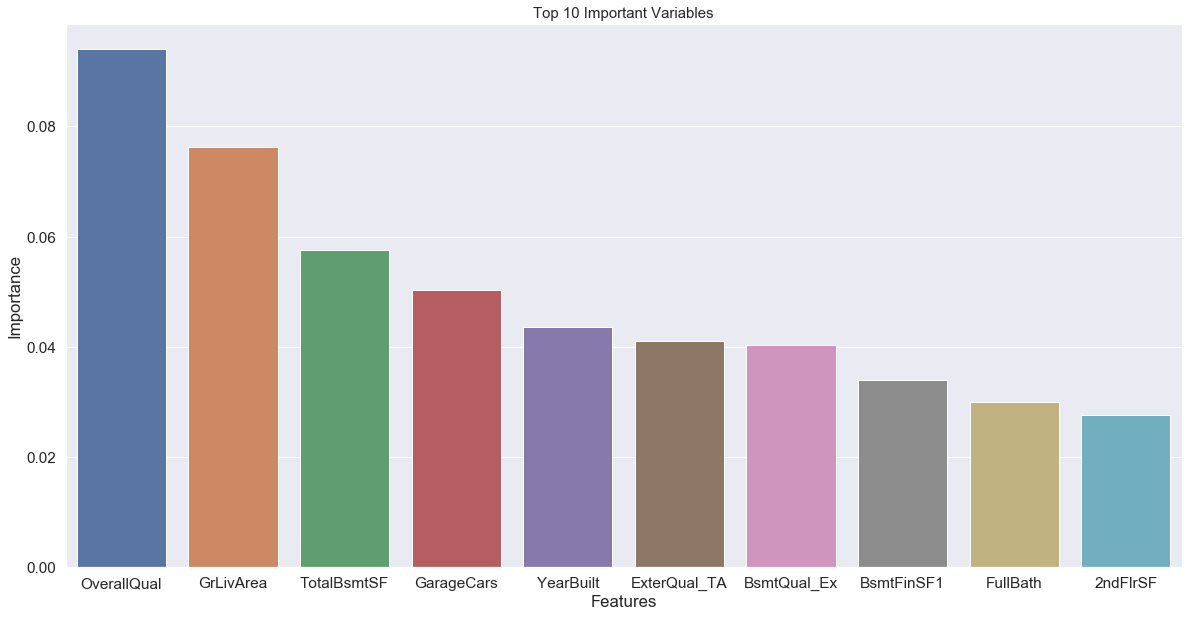

In [114]:
import seaborn as sns

top_importance = importance.iloc[0:10]
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.barplot(x = top_importance["Features"],y = top_importance["Importance"], data = top_importance).set_title("Top 10 Important Variables", fontsize = 15)

### Fitting Random Forest using variable importance

In [22]:
from sklearn.ensemble import RandomForestRegressor

#instantiating parameters for gridsearch on RF
rf_param = {
    "n_estimators": np.linspace(start=650, stop=750, num=10, dtype=int),
    "random_state": [10,30,50,70,90]}

rf_rnbest = RandomForestRegressor(oob_score=True)
grid_rf_rnbest = GridSearchCV(rf_rnbest, rf_param, cv=5, n_jobs=-1)


In [23]:
#Fitting gridsearch based on important features
rf_important_features = list(importance["index"].iloc[0:importance.index[importance["index"]=="Random_Noise"][0]])
X_rn_best = X_rn[rf_important_features]

grid_rf_rnbest.fit(X_rn_best,y_rn)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([650, 661, 672, 683, 694, 705, 716, 727, 738, 750]), 'random_state': [10, 30, 50, 70, 90]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [24]:
#best parameters
grid_rf_rnbest.best_params_, grid_rf_rnbest.best_score_

({'n_estimators': 661, 'random_state': 30}, 0.8871666222714908)

In [30]:
# subsetting important columns for test dataset and then predicting on those columns
test_rf_rnbest = test[rf_important_features]

pred_Saleprice = grid_rf_rnbest.predict(test_rf_rnbest)

predict_tocsv(pred_Saleprice)

### Lasso

Base Case

In [115]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
#from sklearn.preprocessing import StandardScaler

#scale = StandardScaler()
#scale.fit(X)
#X_std = scale.transform(X)
y_log = np.log1p(y)

lasso = Lasso(alpha = 0.0004, max_iter=1000)

lasso.fit(X, y_log)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
lasso_prediction = np.expm1(lasso.predict(test))

predict_tocsv(lasso_prediction)

<b>Lasso coefficient plots</b>

In [128]:
print("total number of features: %i" %len(lasso.coef_))
print("number of features after lasso regularization: %i" %sum(lasso.coef_!=0))

total number of features: 284
number of features after lasso regularization: 118


In [134]:
lasso_coefdf = pd.DataFrame({"features":X.columns, "coefficients":lasso.coef_}).sort_values("coefficients", ascending=False)
lasso_coefdf.loc[(lasso_coefdf.coefficients != 0)]

,features,coefficients
4,OverallCond,0.202982
14,GrLivArea,0.142513
66,Neighborhood_Crawfor,0.110956
82,Neighborhood_StoneBr,0.091647
230,Functional_Typ,0.075516
131,Exterior1st_BrkFace,0.059866
220,KitchenQual_Ex,0.057054
75,Neighborhood_NoRidge,0.048931
3,OverallQual,0.048187
178,BsmtQual_Ex,0.043920


In [162]:
#cross validation scores

from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X, y_log, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

rmsle_cv(lasso).mean()

0.10922575003329762

Text(0.5,1,'Lasso Coefficients > 0')

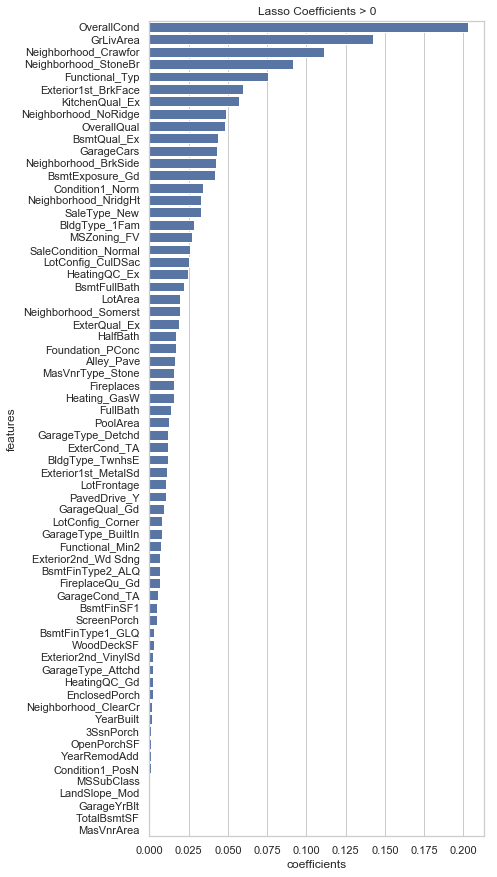

In [149]:
#Lasso coefficients > 0 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="coefficients", y="features", 
            data=lasso_coefdf.loc[lasso_coefdf.coefficients > 0].sort_values("coefficients", ascending=False),
            color="b")
ax.set_title("Lasso Coefficients > 0")

Text(0.5,1,'Lasso Coefficients < 0')

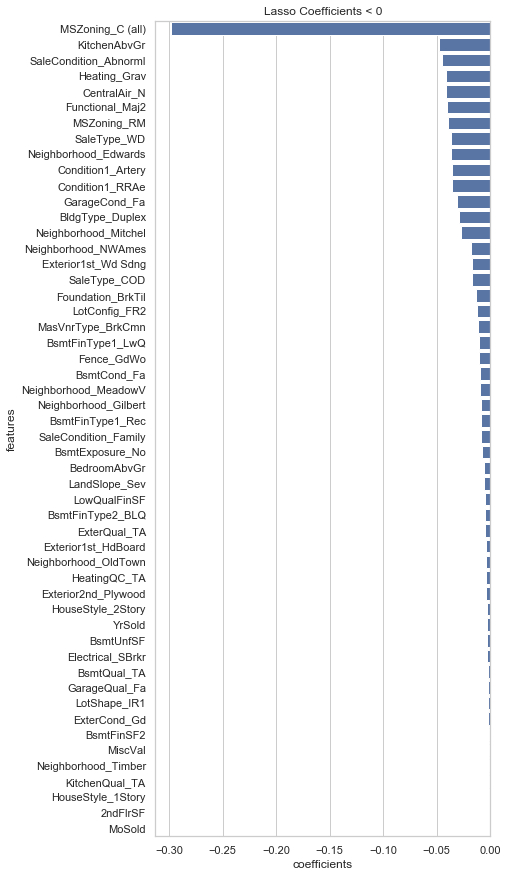

In [147]:
#Lasso coefficients < 0 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="coefficients", y="features", 
            data=lasso_coefdf.loc[lasso_coefdf.coefficients < 0].sort_values("coefficients", ascending=True),
            color="b")
ax.set_title("Lasso Coefficients < 0")

Different Parameters Test for Lasso

In [73]:
#Trying on subsetted data from random forest random noise feature selection

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

y_log = np.log1p(y)

lasso = LassoCV(alphas = [i/100000 for i in range(2,100)], max_iter=1000, cv=5)

lasso.fit(X_rn_best, y_log)

LassoCV(alphas=[2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.000...8, 0.00089, 0.0009, 0.00091, 0.00092, 0.00093, 0.00094, 0.00095, 0.00096, 0.00097, 0.00098, 0.00099],
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [74]:
lasso.score(X_rn_best, y_log)

0.8962030770122816

In [76]:
# subsetting important columns for test dataset and then predicting on those columns
test_rf_rnbest = test[rf_important_features]

pred_Saleprice = np.expm1(lasso.predict(test_rf_rnbest))

predict_tocsv(pred_Saleprice)

### Ridge 

In [97]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

y_log = np.log1p(y)

ridge = RidgeCV(alphas = [i/100000 for i in range(2,100)], cv=5)

ridge.fit(X, y_log)

RidgeCV(alphas=[2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.000...8, 0.00089, 0.0009, 0.00091, 0.00092, 0.00093, 0.00094, 0.00095, 0.00096, 0.00097, 0.00098, 0.00099],
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [92]:
predict_ridge = np.expm1(ridge.predict(test))

predict_tocsv(predict_ridge)

In [98]:
ridge.score(X, y_log)

0.9498664153321469

In [57]:
from patsy import dmatrices
features = "+".join(X.columns)

y, X = dmatrices('SalePrice ~' + features, train, return_type='dataframe')

SyntaxError: invalid syntax (<unknown>, line 1)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = X.columns

TypeError: unhashable type: 'slice'

### Random Forest with subsetted columns from noise column

In [79]:
#fitting on best selected features from RF model with noise column

param_1 = {
    'min_child_weight': np.arange(1,6,2),
    'subsample':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

grid = GridSearchCV(estimator=XGBRegressor(n_estimators=608, max_depth=3), param_grid=param_1, 
                    scoring="neg_mean_squared_error", n_jobs=-1, cv=5)

grid.fit(X_rn_best, y_log)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=608,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_child_weight': array([1, 3, 5]), 'subsample': [0.75, 0.8, 0.85], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [80]:
grid.best_params_, grid.best_score_

({'min_child_weight': 3, 'reg_alpha': 1, 'subsample': 0.85},
 -0.01855306577174669)

In [82]:
predicted = np.expm1(grid.predict(test_rf_rnbest))

predict_tocsv(predicted)